# <font color='Cyan'> Réseau de neurone profond

## Pour notre réseau de neurone profond on va se servir des dictionnaires pour manipuler nos donnnées W, b, dw, db... de manière plus simples

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss

#fonction pour avoir un backfround de figure noir
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


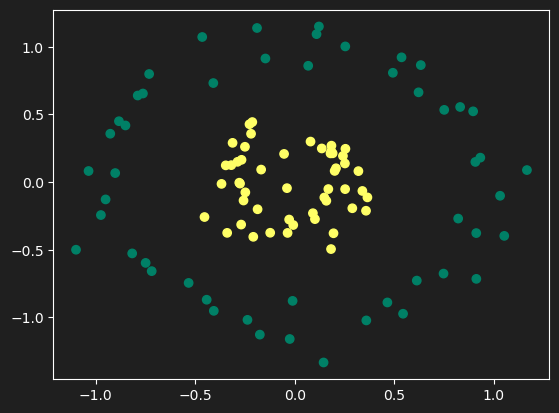

In [150]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

# 2. Initialisation

In [186]:
def initialisation(dimensions):
    
    """ On créer un dictionaire vide que l'on va remplir en fonction du nombre
    de neurone et de couche que l'on souhaite """
    np.random.seed(1)
    parametres = {}
    I = len(dimensions)
    for i in range(1, I):
        parametres['W' + str(i)] = np.random.randn(dimensions[i], dimensions[i - 1])
        parametres['b' + str(i)] = np.random.randn(dimensions[i], 1)

    return parametres

In [240]:
parametres = initialisation([2, 32, 32, 1]) # (3 couches de 32 neurones)

for key, val in parametres.items():
    print(key, val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


# 3. Forward Propagation

In [191]:
def forward_propagation(X, parametres):

    activations = { 'A0' : X} # on définit A0 notre activation initial tel que A prends les paramètres x de notre problèmes
    I = len(parametres) // 2
    for i in range(1, I +1):

        Z = parametres['W' + str(i)].dot(activations['A' + str(i - 1)]) + parametres['b' + str(i)]
        activations['A' + str(i)] = 1 / (1 + np.exp(-Z))

    return activations

In [195]:
activations = forward_propagation(X, parametres)

for key, val in activations.items():
    print(key, val.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


# 4. Backward Propagation

In [198]:
def back_propagation(y, activations, parametres):

    m = y.shape[1]
    I = len(parametres) // 2
    dZ = activations['A' + str(I)] - y
    gradients = {}

    for i in reversed(range(1, I + 1)):
        gradients['dW' + str(i)] = 1 / m * np.dot(dZ, activations['A' + str(i - 1)].T)
        gradients['db' + str(i)] = 1 / m * np.sum(dZ, axis = 1, keepdims = True)
        if i > 1:
            dZ = np.dot(parametres['W' + str(i)].T, dZ) * activations['A' + str(i - 1)] * (1 - activations['A' + str(i - 1)])
    
    return gradients

In [200]:
gradients = back_propagation(y, activations, parametres)

for key, val in gradients.items():
    print(key, val.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


In [202]:
def update(gradients, parametres, learning_rate):

    I = len(parametres) // 2
    for i in range(1, I + 1):
        parametres['W' + str(i)] = parametres['W' + str(i)] - learning_rate * gradients['dW' + str(i)]
        parametres['b' + str(i)] = parametres['b' + str(i)] - learning_rate * gradients['db' + str(i)]
        
    return parametres

In [211]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    I = len(parametres) // 2
    Afinal = activations['A' + str(I)]
    return Afinal >= 0.5

# 5. Création de notre reseau de neurone

In [243]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0]) # on rajoute la dim de nos paramtres x au début du dictionnaire
    dimensions.append(y.shape[0]) # on rajoute notre dim de y a la fin
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        Afinal = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Afinal.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # affichage des courbes
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

100%|██████████| 3000/3000 [00:12<00:00, 230.77it/s]


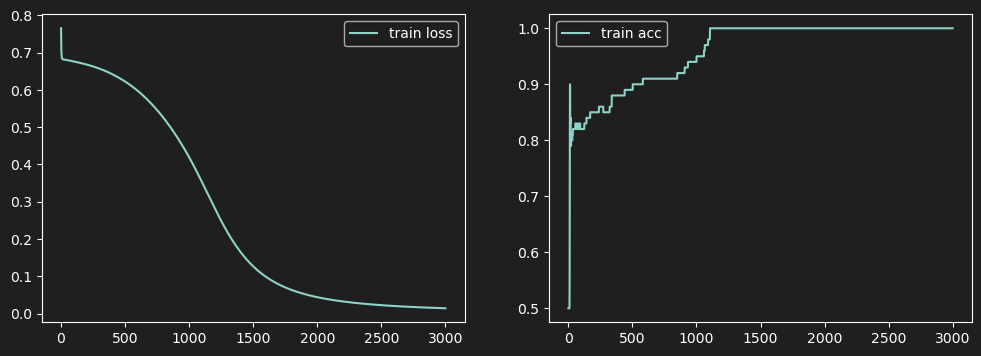

In [232]:
deep_neural_network(X, y)

### Le modèle à complètement appris pour une valeur de l'hyper-parmaètre (learning_rate) de 0.1 avec 3000 essais et 16 neurones dans chaque couche
### Notre modèle de réseau profond est donc capable de résoudre de manière efficace ce type de proplème par rapport à un neurone seul.